# Code along - linear regression

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("../Data/Advertising.csv")

df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## EDA - Exploratory data analysis

In [114]:
df.info() # Easy data set. 200 entries. no nulls. only ints and floats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [115]:
df.drop("Unnamed: 0", axis=1, inplace=True) # Dropping unnamed 0
df.describe().T # .T to transpose the list describe() prints out.



,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


### In this example we are focused on sales, what should we focus on, TV, Radio or newspaper?
tv, radio and newspaper are **features** . Sales is our **label**

In [116]:
df.shape # 200 samples, 3 features, 1 label

(200, 4)

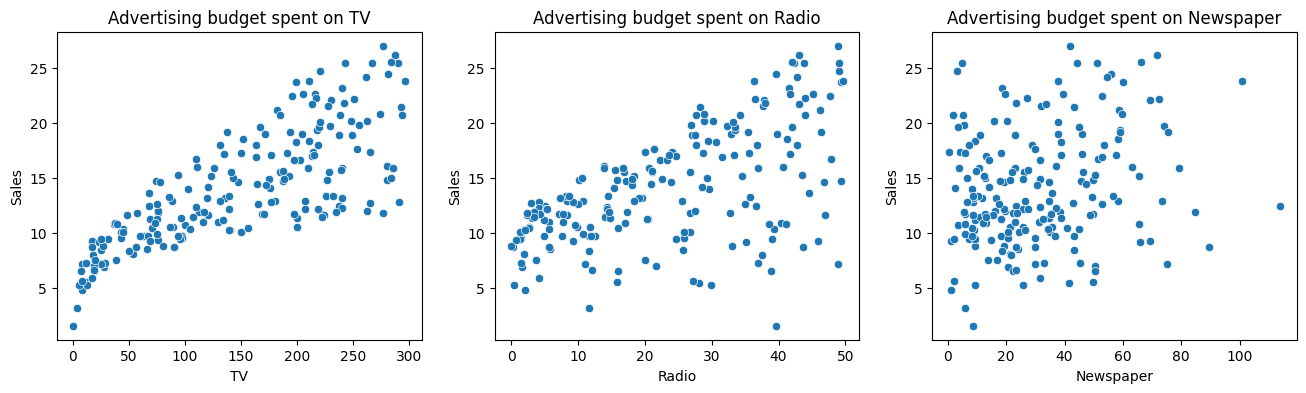

In [117]:
number_features = df.shape[1]-1
number_features
fig, ax = plt.subplots(1, number_features, figsize = (16,4))

for i, feature in enumerate(df.columns[:-1]):
    sns.scatterplot(data = df, x = feature, y="Sales", ax=ax[i])
    ax[i].set_title(f"Advertising budget spent on {feature}")


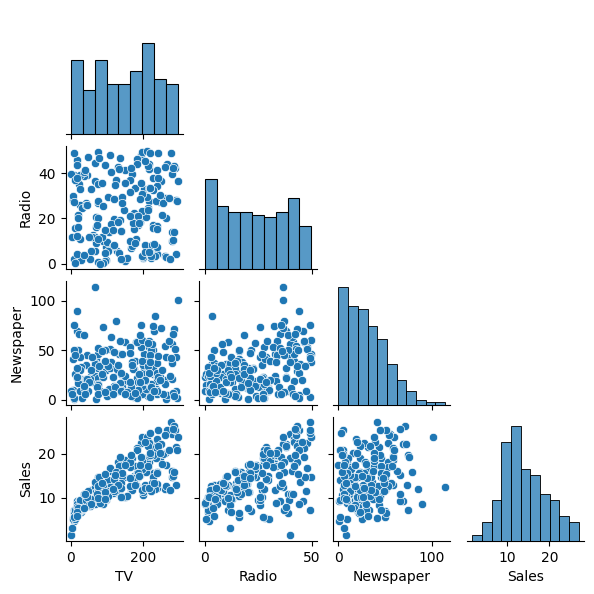

In [118]:
ax = sns.pairplot(df, height = 1.5, corner = True) # Don't do pairplot on to many features, it will become very computationally taxing.

## Simple linear regression

In [119]:
# one variable:
X, y = df["TV"], df["Sales"]


In [120]:
# another way of doing it:
beta_1, beta_0 = np.polyfit(X,y, deg=1) #least squares polynomial fit
beta_0, beta_1

(7.032593549127696, 0.04753664043301972)

[Text(0.5, 1.0, 'Regression line based on budget spent on TV advertisement')]

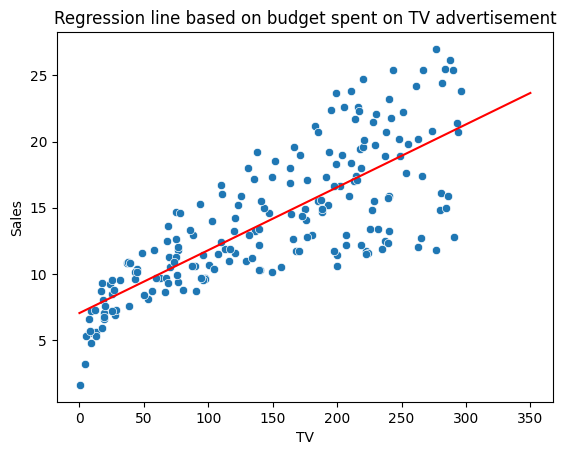

In [121]:
y_hat = lambda x: beta_0 + beta_1*x # Simple linear regression

spending = np.linspace(0, 350)

ax = sns.scatterplot(data = df, x= "TV", y="Sales") # Creating a scatterplot
sns.lineplot(x = spending, y = y_hat(spending), color = "red") # drawing the regression line
ax.set(title="Regression line based on budget spent on TV advertisement")
#sns.regplot(x=spending, y=y_hat(spending), color = "red") #Can also use sns.regplot

<AxesSubplot: xlabel='TV', ylabel='Sales'>

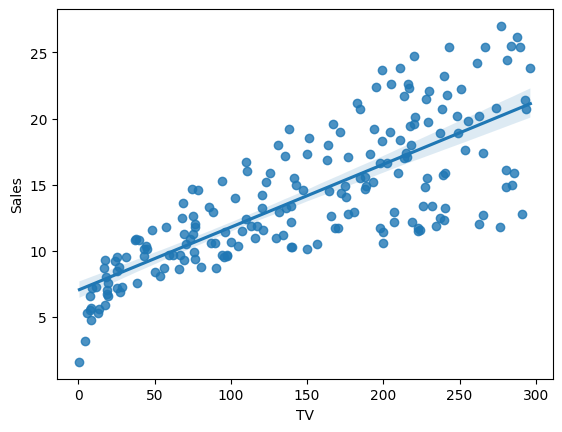

In [122]:
sns.regplot(x=X, y=y) #Can also use sns.regplot

## Multiple linear regression

In [123]:
# Plan is to use all our features, not just TV we used before.
X, y = df.drop("Sales", axis="columns"), df["Sales"] # Setting X for features, and y to be sales.
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [124]:
y.head() # units in sales are in thousands of dollars
#so 22.1 = 22.1k dollars

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [125]:
# Creating a dummy column with only ones. QUESTION: Why only ones. Check the lecture from 2023-02-13
X.insert(0, "Intercept", 1)

In [126]:
X.head() # Intercept is now added with only ones.


,Intercept,TV,Radio,Newspaper
0,1,230.1,37.8,69.2
1,1,44.5,39.3,45.1
2,1,17.2,45.9,69.3
3,1,151.5,41.3,58.5
4,1,180.8,10.8,58.4


In [127]:
X.T@X # X.T @ X. Is the same as picture shown below: XT * X
# @ is a matmul operator. Is not in ordinary in python. is in numpy. matmul operator is overloaded to handle matrix multiplication.

,Intercept,TV,Radio,Newspaper
Intercept,200.0,29408.50,4652.80,6110.80
TV,29408.5,5791118.39,698061.98,919625.28
Radio,4652.8,698061.98,152107.86,164946.55
Newspaper,6110.8,919625.28,164946.55,281096.74


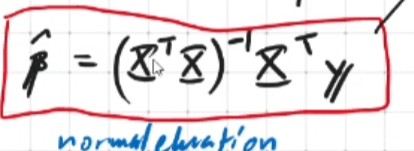

In [128]:
beta_hat = np.linalg.inv(X.T @ X)@ X.T @ y # same equation as above.
beta_hat 

0    2.938889
1    0.045765
2    0.188530
3   -0.001037
dtype: float64

In [129]:
regression_fit = lambda X,y: np.linalg.inv(X.T @ X)@ X.T @ y # Changing above code to be a function.
beta_hat = regression_fit(X,y)

beta_hat # this is our regression line?

0    2.938889
1    0.045765
2    0.188530
3   -0.001037
dtype: float64

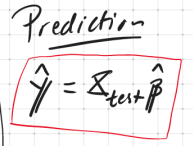
**See below ↓**

In [130]:
predict = lambda x, beta: np.dot(x, beta) #dot product is skalärprodukt in swedish # predict is the same as y hat in above calculation.

test_sample = [1, 230, 38, 69] # 1 is dummy for intercept
y_hat = predict(test_sample, beta_hat)
print(f"with $230k on TV, $38k on radio and $69k on newspaper we get a predicted sales on {y_hat:.1f}k units")

with $230k on TV, $38k on radio and $69k on newspaper we get a predicted sales on 20.6k units


## Train|test split

In [131]:
train_fraction = int(len(df)*0.7) # using int because we do not want an int.

train = df.sample(n=train_fraction, random_state=42, replace=False) # 
train.head()

,TV,Radio,Newspaper,Sales
95,163.3,31.6,52.9,16.9
15,195.4,47.7,52.9,22.4
30,292.9,28.3,43.2,21.4
158,11.7,36.9,45.2,7.3
128,220.3,49.0,3.2,24.7


In [132]:
test = df.drop(train.index)
train.shape, test.shape

((140, 4), (60, 4))

In [133]:
X_train, y_train = train.drop("Sales", axis = "columns"), train["Sales"]
X_test, y_test = test.drop("Sales", axis = "columns"), test["Sales"]
X_train.insert(0, "Intercept", 1)
X_test.insert(0, "Intercept", 1)
X_train.shape, y_train.shape , X_test.shape, y_test.shape 

((140, 4), (140,), (60, 4), (60,))

## Prediction

In [141]:
beta_hat = regression_fit(X_train, y_train)
print(f"Beta parameters: \n{beta_hat}")

predict = lambda X, weights: X @ weights #weights are beta as well.

beta_hat = np.reshape(beta_hat.to_numpy(), (4,1))

y_hat = predict(X_test, beta_hat).to_numpy()

y_hat[:5]

Beta parameters: 
0    2.956094
1    0.046793
2    0.187063
3   -0.004805
dtype: float64


array([[12.17324122],
       [12.19125728],
       [ 3.74653773],
       [ 8.90545078],
       [18.43980126]])

In [142]:
X_test.iloc[1]
# spending $120.2k on TV, $19.6k on radio and $11.6k on newspaper gives prediction on 12.19k units

Intercept      1.0
TV           120.2
Radio         19.6
Newspaper     11.6
Name: 7, dtype: float64

## Evaluate model performance

In [143]:
m = len(y_test)

# removed extra dimension (60,1) -> (60,)
y_hat = np.reshape(y_hat, (m))

mean_absolute_error = 1/m*np.sum(np.abs(y_test-y_hat))
mean_squared_error = 1/m*np.sum((y_test-y_hat)**2)
root_mean_squared_error = np.sqrt(mean_squared_error)

mean_absolute_error, mean_squared_error, root_mean_squared_error



(1.3244490959726523, 3.540425618238498, 1.8816018755939041)